In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  # For plotting graphs 
from datetime import datetime    # To access datetime 
from pandas import Series        # To work on series 
%matplotlib inline 
import warnings                   # To ignore the warnings warnings.filterwarnings("ignore")

In [52]:
train = pd.read_csv(r"C:\Users\NK\Downloads\gc_train.csv")
test = pd.read_csv(r"C:\Users\NK\Downloads\gc_test.csv")


In [53]:
train_original=train.copy() 

In [54]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132000 entries, 0 to 131999
Data columns (total 5 columns):
timestamp          132000 non-null object
main_meter         132000 non-null float64
sub_meter_1        132000 non-null float64
sub_meter_2        132000 non-null float64
building_number    132000 non-null int64
dtypes: float64(3), int64(1), object(1)
memory usage: 5.0+ MB


In [55]:
train['timestamp'] = pd.to_datetime(train['timestamp'],format='%Y-%m-%d %H:%M')  
test['timestamp'] = pd.to_datetime(test['timestamp'],format='%Y-%m-%d %H:%M')  

# Building Wise dataset

In [56]:
ts1 = train[train['building_number']==1]
ts2 = train[train['building_number']==2]
ts3 = train[train['building_number']==3]
ts4 = train[train['building_number']==4]
ts5 = train[train['building_number']==5]


# Setting Timestamp as index

In [57]:
ts1.index = ts1['timestamp']
ts2.index = ts2['timestamp']
ts3.index = ts3['timestamp']
ts4.index = ts4['timestamp']
ts5.index = ts5['timestamp']


# Data is aggregated (1hr,4hr,12hr) Buildingwise

In [58]:
build1 = ts1.resample('1H').mean()
build2 = ts2.resample('1H').mean()
build3 = ts3.resample('1H').mean()
build4 = ts4.resample('1H').mean()
build5 = ts5.resample('1H').mean()
build1_4hr = ts1.resample('4H').mean()
build2_4hr = ts2.resample('4H').mean()
build3_4hr = ts3.resample('4H').mean()
build4_4hr = ts4.resample('4H').mean()
build5_4hr = ts5.resample('4H').mean()
build1_12hr = ts1.resample('12H').mean()
build2_12hr = ts2.resample('12H').mean()
build3_12hr = ts3.resample('12H').mean()
build4_12hr = ts4.resample('12H').mean()
build5_12hr = ts5.resample('12H').mean()

# Two New Features are added 

In [59]:
#Building1_4hr
main_meter_4h4 = build1_4hr['main_meter']
main_meter_4 = np.repeat(main_meter_4h4,4)
main_meter_4_b1 = list(main_meter_4)
build1['main_meter_4'] = main_meter_4_b1
#Building1_12hr
main_meter_12h_1 = build1_12hr['main_meter']
main_meter_12_b1 = np.repeat(main_meter_12h_1,12)
main_meter_12_b1 = list(main_meter_12_b1)
build1['main_meter_12'] = main_meter_12_b1


In [60]:
#Building2_4hr
main_meter_4h_2 = build2_4hr['main_meter']
main_meter_4_2 = np.repeat(main_meter_4h_2,4)
main_meter_4_b2 = list(main_meter_4_2)
build2['main_meter_4'] = main_meter_4_b2
#Building2_12hr
main_meter_12h_2 = build2_12hr['main_meter']
main_meter_12_b2 = np.repeat(main_meter_12h_2,12)
main_meter_12_b2 = list(main_meter_12_b2)
build2['main_meter_12'] = main_meter_12_b2


In [61]:
#Building3_4hr
main_meter_4h_3 = build3_4hr['main_meter']
main_meter_4_3 = np.repeat(main_meter_4h_3,4)
main_meter_4_b3 = list(main_meter_4_3)
build3['main_meter_4'] = main_meter_4_b3
#Building3_12hr
main_meter_12h_3 = build3_12hr['main_meter']
main_meter_12_b3 = np.repeat(main_meter_12h_3,12)
main_meter_12_b3 = list(main_meter_12_b3)
build3['main_meter_12'] = main_meter_12_b3

In [62]:
#Building4_4hr
main_meter_4h_4 = build4_4hr['main_meter']
main_meter_4_4 = np.repeat(main_meter_4h_4,4)
main_meter_4_b4 = list(main_meter_4_4)
build4['main_meter_4'] = main_meter_4_b4
#Building4_12hr
main_meter_12h_4 = build4_12hr['main_meter']
main_meter_12_b4 = np.repeat(main_meter_12h_4,12)
main_meter_12_b4 = list(main_meter_12_b4)
build4['main_meter_12'] = main_meter_12_b4

In [63]:
#Building5
main_meter_4h_5 = build5_4hr['main_meter']
main_meter_4_5 = np.repeat(main_meter_4h_5,4)
main_meter_4_b5 = list(main_meter_4_5)
build5['main_meter_4'] = main_meter_4_b5
#Building5_12hr
main_meter_12h_5 = build5_12hr['main_meter']
main_meter_12_b5 = np.repeat(main_meter_12h_5,12)
main_meter_12_b5 = list(main_meter_12_b5)
build5['main_meter_12'] = main_meter_12_b5

# Reseting the Index Back To normal

In [64]:
build1 = build1.reset_index()
build2 = build2.reset_index()
build3 = build3.reset_index()
build4 = build4.reset_index()
build5 = build5.reset_index()

In [65]:
build1

,timestamp,main_meter,sub_meter_1,sub_meter_2,building_number,main_meter_4,main_meter_12
0,2017-04-01 00:00:00,2452.453706,947.170207,0.450666,1,2713.659481,3778.895815
1,2017-04-01 01:00:00,2722.733293,1142.593908,1.377337,1,2713.659481,3778.895815
2,2017-04-01 02:00:00,2875.868294,1325.265793,3.915958,1,2713.659481,3778.895815
3,2017-04-01 03:00:00,2803.582630,1279.729428,0.084493,1,2713.659481,3778.895815
4,2017-04-01 04:00:00,2465.531768,922.310425,0.155445,1,3931.024433,3778.895815
...,...,...,...,...,...,...,...
6595,2017-12-31 19:00:00,2021.301929,957.024631,0.582683,1,5036.960165,4980.005262
6596,2017-12-31 20:00:00,1848.036869,719.780383,0.000000,1,1963.289479,4980.005262
6597,2017-12-31 21:00:00,1964.453574,742.286785,1.532929,1,1963.289479,4980.005262
6598,2017-12-31 22:00:00,1967.172923,841.157701,2.498131,1,1963.289479,4980.005262


# Concatenating The Data of 5 Buildings 

In [66]:
frames = [build1,build2,build3,build4,build5]
result = pd.concat(frames)
result

,timestamp,main_meter,sub_meter_1,sub_meter_2,building_number,main_meter_4,main_meter_12
0,2017-04-01 00:00:00,2452.453706,947.170207,0.450666,1,2713.659481,3778.895815
1,2017-04-01 01:00:00,2722.733293,1142.593908,1.377337,1,2713.659481,3778.895815
2,2017-04-01 02:00:00,2875.868294,1325.265793,3.915958,1,2713.659481,3778.895815
3,2017-04-01 03:00:00,2803.582630,1279.729428,0.084493,1,2713.659481,3778.895815
4,2017-04-01 04:00:00,2465.531768,922.310425,0.155445,1,3931.024433,3778.895815
...,...,...,...,...,...,...,...
6595,2017-12-31 19:00:00,2563.415615,1249.272994,0.000000,5,9032.988324,7444.083761
6596,2017-12-31 20:00:00,2446.584835,1204.131748,1.975446,5,2328.723484,7444.083761
6597,2017-12-31 21:00:00,2214.268005,1082.285606,1.148236,5,2328.723484,7444.083761
6598,2017-12-31 22:00:00,2318.596948,1175.095957,2.231142,5,2328.723484,7444.083761


In [67]:
#Adding Year,month,day,hour

In [68]:
for i in (result,test):
    i['year']=i.timestamp.dt.year 
    i['month']=i.timestamp.dt.month 
    i['day']=i.timestamp.dt.day
    i['Hour']=i.timestamp.dt.hour 
    

In [69]:
result['day of week']=result['timestamp'].dt.dayofweek 

In [70]:
result['day of week']
temp = result['timestamp']

# New Feature - Is Weekend or not??


In [71]:
def applyer(row):
    if row.dayofweek == 5 or row.dayofweek == 6:
        return 1
    else:
        return 0 
temp2 = result['timestamp'].apply(applyer)   #apply functon is used 
result['weekend']=temp2

In [72]:
result

,timestamp,main_meter,sub_meter_1,sub_meter_2,building_number,main_meter_4,main_meter_12,year,month,day,Hour,day of week,weekend
0,2017-04-01 00:00:00,2452.453706,947.170207,0.450666,1,2713.659481,3778.895815,2017,4,1,0,5,1
1,2017-04-01 01:00:00,2722.733293,1142.593908,1.377337,1,2713.659481,3778.895815,2017,4,1,1,5,1
2,2017-04-01 02:00:00,2875.868294,1325.265793,3.915958,1,2713.659481,3778.895815,2017,4,1,2,5,1
3,2017-04-01 03:00:00,2803.582630,1279.729428,0.084493,1,2713.659481,3778.895815,2017,4,1,3,5,1
4,2017-04-01 04:00:00,2465.531768,922.310425,0.155445,1,3931.024433,3778.895815,2017,4,1,4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6595,2017-12-31 19:00:00,2563.415615,1249.272994,0.000000,5,9032.988324,7444.083761,2017,12,31,19,6,1
6596,2017-12-31 20:00:00,2446.584835,1204.131748,1.975446,5,2328.723484,7444.083761,2017,12,31,20,6,1
6597,2017-12-31 21:00:00,2214.268005,1082.285606,1.148236,5,2328.723484,7444.083761,2017,12,31,21,6,1
6598,2017-12-31 22:00:00,2318.596948,1175.095957,2.231142,5,2328.723484,7444.083761,2017,12,31,22,6,1


# New Feature - IS Corporate or NOt?

In [73]:
temp3 = result['Hour'].apply(lambda x: 0 if 0<= x <= 7 or 20<=x<=23 else 1)   #apply functon is used 
result['corporate']=temp3

In [74]:
result

,timestamp,main_meter,sub_meter_1,sub_meter_2,building_number,main_meter_4,main_meter_12,year,month,day,Hour,day of week,weekend,corporate
0,2017-04-01 00:00:00,2452.453706,947.170207,0.450666,1,2713.659481,3778.895815,2017,4,1,0,5,1,0
1,2017-04-01 01:00:00,2722.733293,1142.593908,1.377337,1,2713.659481,3778.895815,2017,4,1,1,5,1,0
2,2017-04-01 02:00:00,2875.868294,1325.265793,3.915958,1,2713.659481,3778.895815,2017,4,1,2,5,1,0
3,2017-04-01 03:00:00,2803.582630,1279.729428,0.084493,1,2713.659481,3778.895815,2017,4,1,3,5,1,0
4,2017-04-01 04:00:00,2465.531768,922.310425,0.155445,1,3931.024433,3778.895815,2017,4,1,4,5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6595,2017-12-31 19:00:00,2563.415615,1249.272994,0.000000,5,9032.988324,7444.083761,2017,12,31,19,6,1,1
6596,2017-12-31 20:00:00,2446.584835,1204.131748,1.975446,5,2328.723484,7444.083761,2017,12,31,20,6,1,0
6597,2017-12-31 21:00:00,2214.268005,1082.285606,1.148236,5,2328.723484,7444.083761,2017,12,31,21,6,1,0
6598,2017-12-31 22:00:00,2318.596948,1175.095957,2.231142,5,2328.723484,7444.083761,2017,12,31,22,6,1,0


In [75]:
result.describe()

,main_meter,sub_meter_1,sub_meter_2,building_number,main_meter_4,main_meter_12,year,month,day,Hour,day of week,weekend,corporate
count,33000.000000,33000.000000,33000.000000,33000.000000,33000.000000,33000.000000,33000.0,33000.000000,33000.000000,33000.000000,33000.000000,33000.000000,33000.000000
mean,6095.767107,2092.888851,776.830989,3.000000,6095.767107,6095.767107,2017.0,8.007273,15.781818,11.500000,3.018182,0.290909,0.500000
std,3438.791729,1112.116862,873.164115,1.414235,3236.947076,2220.165335,0.0,2.579669,8.823019,6.922291,2.004488,0.454189,0.500008
min,422.507566,0.000000,0.000000,1.000000,1790.771500,1860.328045,2017.0,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,3477.157435,1384.265411,5.263125,2.000000,3669.030377,4477.047270,2017.0,6.000000,8.000000,5.750000,1.000000,0.000000,0.000000
50%,5384.620276,2076.003734,623.060637,3.000000,5444.296217,5585.374927,2017.0,8.000000,16.000000,11.500000,3.000000,0.000000,0.500000
75%,7663.856060,2748.613271,1333.573310,4.000000,7565.017164,7416.156545,2017.0,10.000000,23.000000,17.250000,5.000000,1.000000,1.000000
max,22921.319213,7030.578001,4290.668675,5.000000,21979.828456,15047.907888,2017.0,12.000000,31.000000,23.000000,6.000000,1.000000,1.000000


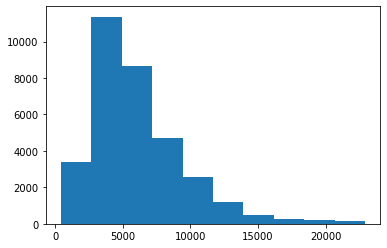

In [76]:
plt.hist(result['main_meter']);

we have anomoly data after 15000 for main_meter , so we will replace these values by the mean of the column of main_meter  

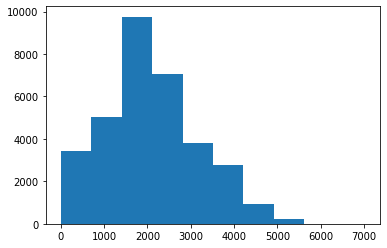

In [77]:
plt.hist(result['sub_meter_1']);

we have anomoly data after 5000 for sub_meter_1 , so we will replace these values by the mean of the column of sub_meter_1

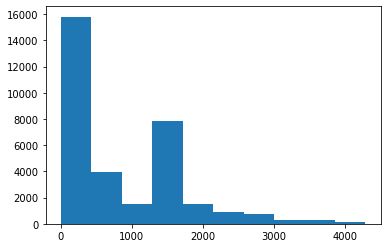

In [78]:
plt.hist(result['sub_meter_2']);

we have anomoly data after 3000 for sub_meter_1 , so we will replace these values by the mean of the column of sub_meter_1

# Storing the mean of the meters to replace the anolomies

In [79]:
analomy_mean_main_meter = result['main_meter'].mean()
analomy_mean_sub_meter_1 = result['sub_meter_1'].mean()
analomy_mean_sub_meter_2 = result['sub_meter_2'].mean()


# Replacing the anomolies by the means of the respective meters

In [80]:
result.loc[(result.main_meter > 15000),'main_meter']=analomy_mean_main_meter

result.loc[(result.sub_meter_1 > 5000),'sub_meter_1']=analomy_mean_sub_meter_2

result.loc[(result.sub_meter_2 > 3000),'sub_meter_2']=analomy_mean_sub_meter_2


In [81]:
result

,timestamp,main_meter,sub_meter_1,sub_meter_2,building_number,main_meter_4,main_meter_12,year,month,day,Hour,day of week,weekend,corporate
0,2017-04-01 00:00:00,2452.453706,947.170207,0.450666,1,2713.659481,3778.895815,2017,4,1,0,5,1,0
1,2017-04-01 01:00:00,2722.733293,1142.593908,1.377337,1,2713.659481,3778.895815,2017,4,1,1,5,1,0
2,2017-04-01 02:00:00,2875.868294,1325.265793,3.915958,1,2713.659481,3778.895815,2017,4,1,2,5,1,0
3,2017-04-01 03:00:00,2803.582630,1279.729428,0.084493,1,2713.659481,3778.895815,2017,4,1,3,5,1,0
4,2017-04-01 04:00:00,2465.531768,922.310425,0.155445,1,3931.024433,3778.895815,2017,4,1,4,5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6595,2017-12-31 19:00:00,2563.415615,1249.272994,0.000000,5,9032.988324,7444.083761,2017,12,31,19,6,1,1
6596,2017-12-31 20:00:00,2446.584835,1204.131748,1.975446,5,2328.723484,7444.083761,2017,12,31,20,6,1,0
6597,2017-12-31 21:00:00,2214.268005,1082.285606,1.148236,5,2328.723484,7444.083761,2017,12,31,21,6,1,0
6598,2017-12-31 22:00:00,2318.596948,1175.095957,2.231142,5,2328.723484,7444.083761,2017,12,31,22,6,1,0


In [82]:
#droping columns who were used to create to new features
result = result.drop(['Hour','day','month','year'],axis = 1)

In [83]:
#result

# One Hot Encoding

In [84]:
one_hot = ['day of week','building_number']
final = pd.get_dummies(result,columns = one_hot)

In [85]:
final

,timestamp,main_meter,sub_meter_1,sub_meter_2,main_meter_4,main_meter_12,weekend,corporate,day of week_0,day of week_1,day of week_2,day of week_3,day of week_4,day of week_5,day of week_6,building_number_1,building_number_2,building_number_3,building_number_4,building_number_5
0,2017-04-01 00:00:00,2452.453706,947.170207,0.450666,2713.659481,3778.895815,1,0,0,0,0,0,0,1,0,1,0,0,0,0
1,2017-04-01 01:00:00,2722.733293,1142.593908,1.377337,2713.659481,3778.895815,1,0,0,0,0,0,0,1,0,1,0,0,0,0
2,2017-04-01 02:00:00,2875.868294,1325.265793,3.915958,2713.659481,3778.895815,1,0,0,0,0,0,0,1,0,1,0,0,0,0
3,2017-04-01 03:00:00,2803.582630,1279.729428,0.084493,2713.659481,3778.895815,1,0,0,0,0,0,0,1,0,1,0,0,0,0
4,2017-04-01 04:00:00,2465.531768,922.310425,0.155445,3931.024433,3778.895815,1,0,0,0,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6595,2017-12-31 19:00:00,2563.415615,1249.272994,0.000000,9032.988324,7444.083761,1,1,0,0,0,0,0,0,1,0,0,0,0,1
6596,2017-12-31 20:00:00,2446.584835,1204.131748,1.975446,2328.723484,7444.083761,1,0,0,0,0,0,0,0,1,0,0,0,0,1
6597,2017-12-31 21:00:00,2214.268005,1082.285606,1.148236,2328.723484,7444.083761,1,0,0,0,0,0,0,0,1,0,0,0,0,1
6598,2017-12-31 22:00:00,2318.596948,1175.095957,2.231142,2328.723484,7444.083761,1,0,0,0,0,0,0,0,1,0,0,0,0,1
